# ![R/GA logo](https://www.bairesdev.com/wp-content/uploads//2019/01/RGA-logo.svg)

# Data Science Assesment Test | Data & Marketing Sciences | Buenos Aires

#### Propietary and Confidential ©2020

## Hi :)

Congrats! If you're here it means that you were selected among several candidates to keep on track and becoming part of our Data Science Team.

At this point, you should know that what defines R/GA is the searching for a ___More Human Future___. Our duty as data geeks is to deliver trustworthy, non-bias, and relevant information to improve our customer's experience. Don't forget:

<h4 align="center">We are a team of Data Geeks,</h4> 
    
<h4 align="center">We are obsessed with measuring correctly,</h4> 
    
<h4 align="center">We are delighted integrating scattered Data sources,</h4> 

<h4 align="center">We are excited finding a precise predictive model,</h4> 

<h4 align="center">We fall in love with sexy Data visualizations.</h4> 

<h4 align="center">We aim to create and deliver value through Data.</h4> 

<h4 align="center">Less gut-feeling, more informed decisions.</h4> 

<h4 align="center">Less Big Data, more Big Insights,</h4> 

<h4 align="center">Fewer promises, more results.</h4> 

<h4 align="center">We are here to build a more human future, through the power of Data.</h4> 

<h4 align="center">Come join us!</h4>

## Vision

We don't expect you to know it all. Unicorns don't exist and if they do, we don't care. We only want highly motivated, passionate, and thinking people. Great ideas are not guaranteed with a degree, leadership is a function that anyone can exercise, and knowledge doesn't discriminate fields. We don't care how you dress or who you like, we embrace divergence. If you're an outlier like us, maybe together we can shift the mean!

## Contents

We prepared this test in order to understand how you solve problems. As the world is a complex place, feel free to answer however you want, there is no single correct solution.

### Sections

1) Basic Coding
2) Business
3) Statistics
4) Machine Learning

### What are the evaluation criteria?

- Simple yet creative solutions.
- A clear understanding of concepts.
- Efficiency while solving problems.
- Nice and organized code.
- Out-of-the-box thinking is always a plus.

Now, without extra words, let the game begin. Have fun!

#### Important:

- Feel free to use any package or library that you consider it might be useful.
- Searching over StackOverflow or other resources is not only valid but encouraged.
- Do not post these exercises over the internet, if you do you will be immediately excluded from the process.

In [7]:
# Function to download the data
import scipy

def dataframe_creator(url, filename):

  import urllib.request
  import pandas as pd

  u = urllib.request.urlopen(url)
  data = u.read()
  u.close()

  with open(filename, "wb") as f :
      f.write(data)

  return pd.read_csv(filename)

## I. Basic Coding

### 1.1 The big brother

The office is preparing an identification system for its people. ___They ask you to find a way to create a function that can use the person's name to deliver an ID (str).___

Some specifications:

- It needs to include the first and last letter of the name (capitalized)
- Some DateTime-based coding must be added
- It must finish with a random alphanumeric label (5 characters) with at least one capped letter (randomly assigned)

Example: Lucas is Ls-110512062020-x3Mz3


In [2]:
# Solve this problem here

from datetime import datetime
from random import SystemRandom, randrange
from string import ascii_lowercase, ascii_uppercase, digits

def get_id_by_name(name: str):
    first_letter = name[0].upper()
    last_letter = name[-1].lower()

    timestamp = datetime.now().timestamp()
    time_str = datetime.fromtimestamp(timestamp).strftime('%H%M%d%m%Y')
    
    token = generate_token(5)
    
    id = f'{first_letter}{last_letter}-{time_str}-{token}'
    return id
    
def generate_token(N: int = 5):
    token = ''.join(SystemRandom()
                    .choice(ascii_lowercase + ascii_uppercase + digits) 
                    for _ in range(N)
                    )
    
    # If no digit is a letter try again
    if not any(letter.isalpha() for letter in token):
        return generate_token(N)
    
    # If no letter is uppercase select one randomly
    while not any(letter.isupper() for letter in token):
        index = randrange(5)
        alpha_char = token[index]
        if alpha_char.isalpha():
            token = token[:index] + alpha_char.upper() + token[index + 1:]
        
    return token

### 1.2 Making sense out of the mess

You're currently working on a project that requires to analyze some webpages in order to create a better indexation.

As a Proof of Concept (PoC), ___you proposed that creating a some visualization could be a nice and simple way to show how easy it is to identify important tags___. So, the basic steps should be:

- Access to the extract of every page.
- Clean the data and keep only the informative words (remove stop words).
- Count the occurrences of each word and use it as an input for a visualization.
- Generate a figure merging data from all pages.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


super mario is a japanese platform video game series and media franchise created by nintendo and featuring their mascot  mario  alternatively called the super mario bros  series or simply the mario series  it is the central series of the greater mario franchise  at least one super mario game has been released for every major nintendo video game console  there have also been a number of super mario video games released on non nintendo gaming platforms the super mario games follow mario  adventures  typically in the fictional mushroom kingdom with mario as the player character  he is often joined by his brother  luigi  and occasionally by other members of the mario cast  as in platform video games  the player runs and jumps across platforms and atop enemies in themed levels  the games have simple plots  typically with mario re

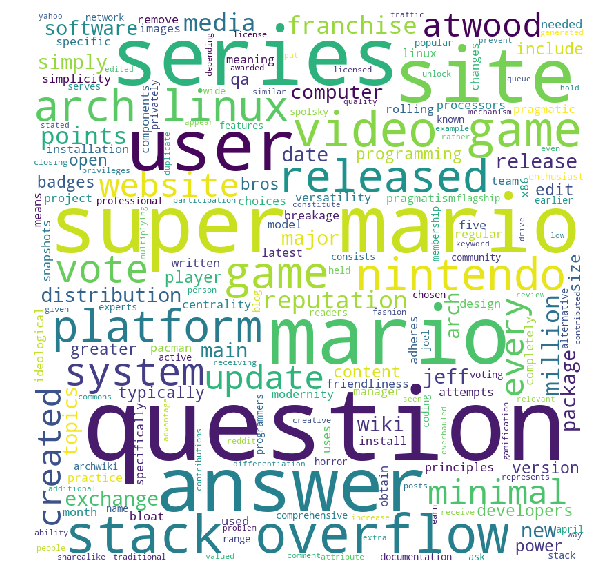

In [2]:
from nltk import download
from nltk.corpus import stopwords
from requests import get
import re
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

download('stopwords')
en_stops = set(stopwords.words('english'))

# Solve this problem here

request_url = """https://en.wikipedia.org/w/api.php?action=query&\
format=json&prop=extracts&titles=Stack%20Overflow%7CArch%20Linux%7cSuper%20Mario\
&utf8=1&exintro=1&exsectionformat=plain"""

symbols_to_remove = [',', '.', '-', "'s", '"', "'", ';', ':', '(', ')']

def visualize_word_count_from_url(url: str):
    response = get(request_url)
    payload = response.json()
    pages = payload['query']['pages']
    text = ''
    
    for page in pages.values():
        extract = page['extract']
        
        cleaned_extract = clean_data(extract);
        
        for word in cleaned_extract.split():
            if all(letter.isnumeric() for letter in word):
                continue
            
            if word not in en_stops:
                text += f'{word} '
    
    plot_wordcloud(text)
        

def remove_html(raw_html):
    expression = '<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});'
    cleanr = re.compile(expression)
    clean_text = re.sub(cleanr, '', raw_html)
    return clean_text

def clean_data(data):
    # Remove HTML
    clean_data = remove_html(data)

    # Split by symbols
    for char_to_replace in symbols_to_remove:
        clean_data = clean_data.replace(char_to_replace, ' ')

    # Make lowercase
    return clean_data.lower()

def plot_wordcloud(text):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
      
    plt.show() 

visualize_word_count_from_url(request_url)

## II. Business

### 2.1 Go from zero to hero

A very interesting article was published regarding how [self-employed are increasingly turning to private lenders for mortages](https://business.financialpost.com/pmn/business-pmn/self-employed-increasingly-turning-to-private-lenders-for-mortgages
).

___As many of our clients are banks, can you come up with a simple idea to transform this problem into an opportunity?___

Note: it is not necessary to dive into technical details, just try to frame the problem and generate a possible plan of action.

Banks are losing market share of self-employed people who take a mortage by private lenders. They focus on property value, have higher rates and fees, but ask for less requirements. However, changes on regulations will slowly allow banks to offer the same benefits that private lenders.
We could offer them different services in order to accomplish compete with private lenders:
1. We could create a model for calculating risk, taking into account the debt-to-income ratio, industry, years of experience, etc. I'm sure a bank can get a huge datasets about previous times where they had to forclose.
2. If they don't have it already, we could build them a model to calculate the property value.
3. Finally, banks must already have information about self-employed people who were rejected by them. If they can identify which of them ended up going with a private lender, we could build them a model to predict how likely is a customer to go with that alternative and make them a better offer. They would slowly recover market share.

## III. Statistics

### 3.1 Improving a website

A coworker performed an A/B test to improve the revenue of your company's website. He created two different flows and registered the amount of money that each customer expended.

The test is finished and your colleague uploaded all the data to a spreadsheet.

He asked you to analyze the data and help him to decide whether the alternative configuration is better than control. Also, since this is going to be presented at the management, you need to find a way to explain and show (justifying from the data) how this change could potentially impact company revenue.

Some notes about how data was collected:

- Users were randomly assigned to each config from the minute they entered the website.
- It is a representative sample.
- All the variables were properly controlled.

In [17]:
# Solve this problem here
import pandas as pd
import numpy as np
import scipy.stats as ss

df = dataframe_creator("https://www.dropbox.com/s/1a5ss6oknp93bku/ab_website.csv?dl=1", 'ab_testing.csv')

a_df = df[df['Group'] == 'A']
b_df = df[df['Group'] == 'B']

a_sample = len(a_df) # 499
b_sample = len(b_df) # 401

a_mean = a_df['Amount'].mean() # 2.51695835650501
b_mean = b_df['Amount'].mean() # 4.502010067037407

a_std = a_df['Amount'].std() # 1.4456408512586871
b_std = b_df['Amount'].std() # 1.4052280666239492

As b_mean > a_mean I state:

- As H0, that the company revenue will be the same with the experimental configuration as with the control configuration. 

- As H1, that the company revenue will be HIGHER with the experimental configuration than with the control configuration. 

In [18]:
z_score = (b_mean - a_mean)/np.sqrt((b_std**2/b_sample) + (a_std**2/a_sample)) 
# 20.794735877762626

p_value = ss.norm.sf(z_score) 
# 2.4150284516449197e-96

difference = b_mean / a_mean 
# 1.788670859572263

Given that:
- Samples were random
- Samples are representative
- All the variables were properly controlled
- p_value < 0.01 (by such an extreme difference) 

I will conclude that the experimental configuration will increase revenue by, approximately, 1.78 times

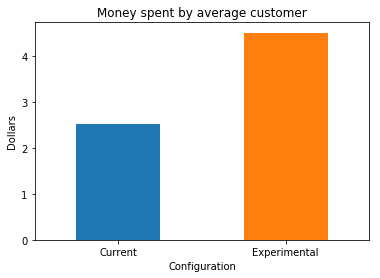

In [20]:
df = pd.DataFrame({'configuration':['Current', 'Experimental'], 'Amount':[a_mean, b_mean]})
ax = df.plot.bar(x='configuration', y='Amount', rot=0, legend=False)
ax.set_title('Money spent by average customer')

ax.set_ylabel('Dollars')
ax.set_xlabel('Configuration')

plt.show()

### 3.2 Playing with the odds

A guy is surrounded by a huge crowd. He has a bag full of coins and is claiming: "There are 1000 coins and only 1 have either two heads or two tails, and I will pay one million dollars to the person that finds it". However, there is a condition: "You can only see one face of the coin, but you can flip it as many times as you want. However, every time you throw it you lose 100.000 dollars from the prize."

You, as a data scientist, know that there is a statistical approach to calculate the odds. So you took a coin and start to flip it. 

__What are the probabilities of have grabbed the two-faced coin if at each trial (out of 20) it landed the same face? When would you consider stop flipping it and why?__

Take into account that N=0 means having no observation at all.

Note: the output must have 3 decimals points.

What are the odds of that being a fair coin?
Picking a fair coin 999/1000 = 0.999‬
The coin landing the same face twenty times: 0.5^20 = 0.00000095367431640625‬ = 9.536x10^(-7)
Both: 0.00000095272064208984375 = 9.526x10^(-7)


Probability of picking up the two-faced coin 1/1000 = 0.001
Probability of tossing the coin and getting the same face ten times: 0.0009765625 < 0.001

If after ten tosses the coin lands the same face, it would make sense to stop flipping it, as it's more likely that I've grabbed the two-faced coin. However, given that I would have lost the entire price at that point, I would stop after the nineth flip.

## IV. Machine Learning

### 4.1 Thinking as a scientist

A colleague of yours managed to train and deploy a model into production. So far he got no errors, however, the performance is different from what he observed while training the model. Since he considers you as an expert, he asked you if he may be doing something wrong.

___You, a good data scientist, are already thinking about possible hypotheses about what is going on. In addition, due to the importance of this model, you will propose the most efficient way to check each of them.___

Your answer:

1. My first guess is that there is a problem with the design of the model. Maybe the model was overfitting, and when it reached production more data was added and the error rate got higher. Analyzing the cases that the model got wrong and adding new features for dealing with those cases _will_ improve the model performance, hopefully avoiding overfitting.
2. Giving a step back, looking for a different algorithm or back-testing the model in order to select a suitable amount of historical data would also be a good idea, in case the model is overfitting.
3. Weighting the data is another strategy that could be taken. 
4. Continuous learning: a pipeline could be built to monitor the model performance with fresh data, checking for key variables and setting up warnings. The results could be visualized and compared. This would not improve the model performance, but it would allow you to detect _when_ the model started degrading, and give you more tools to discover what the problem is.


 

### 4.2 Making important decisions
After months of work, you end up with two Machine Learning models. As your company must keep its costs low, you did everything using a local machine and you will definetely have to keep working that way.

Machine specs: Intel core i5 9600K, 64GB RAM 3200mhz DDR4, 2TB SSD, GPU Nvidia RTX 2080 Super.

Now is time to decide which one you will deploy.

Model 1:

- Deep Neural Network
- AUC = 0.74
- 73% accuracy
- 65 features


Model 2:

- XGBoost
- AUC = 0.83
- 71% accuracy
- 23 features

___What are the eventual pros and cons of choosing each one? Take into account that this model must be kept in production, meaning (among other things) that it will require updates once in a while.___

Notes: it will be used to classify our customers in real-time and it is expected to deal with thousands of requests per day. Also, a typical raw dataset has at least 15GB of records (five million rows and 18 features) and it can grow up or down depending on data processing and feature engineering.

Your answer:

#### Pros of Model 1:
- A NN model can deal with a lot of data without sacrificing performance. In this case in particular, I think the DNN is a better option given the size of the data.
- If the goal is to gain insights from the data (and not only for it to work) Model 1 _may_ be a better option, given that it works with more features. It's not doing a good job at classifying though, but I'm not sure how that would impact insights.

#### Pros of Model 2:
- Given that there will be updates once in a while, I think Model 2 may be a better option. XGBoost is a better option for scaling, as tree-based models remain invariant by scale.
- If costs are something to take into account, I'd go with XGBoost. Their memory consumption is particularly low, while DNN's is particularly high. Vertical scaling will be cheaper.
- If the cost of either false-positives or false-negatives is too high, or it's critical to have a higher classification success-rate, I'd go with Model 2. Accuracy is not that different between them, but Model 1 is the worst at classifying.

  
  

### 4.3 A detective to the rescue

Something terrible has happened. One of our clients experienced a breach in its cybersecurity system and some fraudulent transactions were made. Sadly, their analysts can only identify them after they get approved, meaning that by then no turn back is possible. Also, since they process tens of thousands of transactions per day, cancel all of them is out of the table. In a matter of fact, they calculated that they can afford to lose 100 real requests every 1 fraudulent, top.

They call us and handed an entire dataset from a similar event. At that time, they didn't do anything and assessed the damage after the payment clearance, labeling both fraud and real operations.

___This is a call of action to show all your skills and recover as much money as possible. You will have to train a model as fast as possible to help them to catalog each operation and reduce the losses. Time is ticking so hurry up!___

In [126]:
import seaborn as sns
from sklearn.preprocessing import Imputer
%matplotlib inline 

In [127]:
df = dataframe_creator("https://www.dropbox.com/s/apvogs1y8eue85y/fraud.csv?dl=1", 'fraud.csv')

In [59]:
df.head()

,ID,transactionType,elapsedTime,transactionAmount,countryOrigin,timestamp
0,753b2920-6220-4f92-ae31-ffdf2d3c8926,Normal,5.875139,286.836034,Peru,20/09/20 13:13
1,134cee15-8e83-4008-826d-a901444835d8,Normal,9.416028,290.854883,Argentina,20/09/20 13:55
2,e44d8a8f-a731-4673-9623-6235e6570734,Normal,9.237485,204.623636,Brazil,20/09/20 13:01
3,35fe441a-44c2-40c2-8a8d-2b82116e52a6,Normal,7.063630,178.429538,Chile,20/09/20 13:43
4,8267121b-91a2-4315-a458-a0a2d932b899,Normal,3.348252,296.586418,Germany,20/09/20 13:23


In [60]:
df.describe()

,elapsedTime,transactionAmount
count,10158.000000,10158.000000
mean,5.461594,200.589186
std,2.623471,57.518719
min,0.006628,100.001056
25%,3.171199,151.111718
50%,5.442954,201.736019
75%,7.746236,249.245509
max,9.999805,299.972567


## EDA

The ID and timestamp columns don't provide any value, as they will be different for each transaction. I will just remove them.

In [159]:
df.drop(['ID'], axis=1, inplace=True)
df.drop(['timestamp'], axis=1, inplace=True)

KeyError: "['ID'] not found in axis"

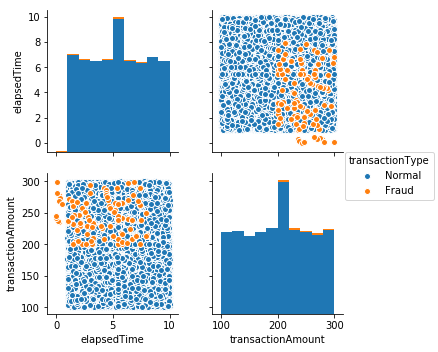

In [160]:
sns.pairplot(df, hue='transactionType')

In [161]:
df_normal = df[df['transactionType'] == 'Normal']
df_normal.describe()

,elapsedTime,transactionAmount
count,9554.000000,9554.000000
mean,5.483597,200.211451
std,2.552797,55.954150
min,1.001261,100.001056
25%,3.311863,153.910135
50%,5.461594,200.589186
75%,7.662538,246.280854
max,9.998538,299.972567


In [162]:
df_fraud = df[df['transactionType'] == 'Fraud']
df_fraud.describe()

,elapsedTime,transactionAmount
count,98.000000,98.000000
mean,3.945873,243.218171
std,2.285721,28.007480
min,0.006628,200.110651
25%,2.086574,219.086921
50%,4.189630,240.849392
75%,5.754035,265.277966
max,7.974828,299.360093


In [163]:
df_n = df[(df['transactionType'] != 'Normal') & (df['transactionType'] != 'Fraud')]
df_n.describe()

,elapsedTime,transactionAmount
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


Then, I will replace any numeric value that was not set, with the mean of that column

In [164]:
imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)

df['elapsedTime'].replace('', np.nan, inplace=True)
df['transactionAmount'].replace('', np.nan, inplace=True)

df[['elapsedTime']] = imputer.fit_transform(df[['elapsedTime']])
df[['transactionAmount']] = imputer.fit_transform(df[['transactionAmount']])

Finally, I will drop the rows that are missing any categorical data

In [165]:
df['countryOrigin'].replace('', np.nan, inplace=True)
df['transactionType'].replace('', np.nan, inplace=True)

df.dropna(subset=['countryOrigin'], inplace=True)
df.dropna(subset=['transactionType'], inplace=True)

In [166]:
df_normal = df[df['transactionType'] == 'Normal']
df_fraud = df[df['transactionType'] == 'Fraud']

print('normal', len(df_normal))
print('fraud', len(df_fraud))

normal 9554
fraud 98


I lost a bit over 5% of the normal data, and just one record of the fraud data.
I think the data is clean enough to start working on the model.

## Model
I will create two models: a decision tree and a random forest. I will evaluate which one provides a better result, although given the amount of data I suspect the random forest will be the winner.

In [138]:
from sklearn.cross_validation import train_test_split

In [167]:
df_no_transaction_type = df.drop('transactionType', axis=1)
X = pd.get_dummies(df_no_transaction_type)
y = df['transactionType']


In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


### Model 1: Decision Tree


In [169]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [170]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [171]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

      Fraud       0.19      0.15      0.16        34
     Normal       0.99      0.99      0.99      2862

avg / total       0.98      0.98      0.98      2896



In [172]:
print(confusion_matrix(y_test,predictions))


[[   5   29]
 [  22 2840]]


### Model 2: Random Forest

In [173]:
from sklearn.ensemble import RandomForestClassifier

In [174]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [175]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

      Fraud       1.00      0.15      0.26        34
     Normal       0.99      1.00      0.99      2862

avg / total       0.99      0.99      0.99      2896



In [176]:
print(confusion_matrix(y_test,rfc_pred))

[[   5   29]
 [   0 2862]]


Model 2 is clearly better at detecting fraudulent transactions, and even though it will lose more real transactions on the process, it's still down the limit required above: a hundred real transactions for each one faulty.

### 4.4 Data too big?

Sometimes as data scientists we found ourselves dealing with data that require more power than NumPy, scikit-learn, or pandas can provide.

__How can we face processing or modeling in those scenarios?__

1. The first alternative that comes to my mind is reading the data by batches. For example in pandas, it's as easy as passing the "chunksize" parameter when reading a CSV:
```
pd.read_csv('data.csv', chunksize=1000000)
```

2. Following the same logic, we could import only the columns we are interested in. If we have a hundred features but we will only work with ten, we could reduce the workload a 90% by just importing those ones.

3. Another alternative is to change the dtypes. For example, instead of reading the data as int64 we could read it as int32. This would optimize the memory usage, although we will need to deal with trunked data.

2. If I have decided I _want_ to work with my common libraries, another alternative would be to use a VM with higher computing power/memory on AWS, GCP or any other cloud provider.

3. My last, and in my opinion most adequate answer, is to _not_ use pandas, NumPy nor scikit-learn if I'm dealing with an amount of data they are not prepared to handle. As professionals, we should aim to have a wide tool-kit, and use the right tool for every power.

Alternatives:

For pandas and NumPy: Dask, Spark

For scikit-learn: MLlib 

## Final words

Feel free to use this space if you have suggestions, comments, or anything that you would like to share with us :)

#### You made it! Now save your notebook and let us know that you finished.

**Good luck!**